## Séries Temporais - Modelo ARMA

In [1]:
import pandas as pd

### 1. Análise dos Dados

In [11]:
dados3 = pd.read_csv("clima_india.csv")

dados3.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Verificando tipo das variáveis

In [12]:
dados3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Alterando tipo da variável para datetime

In [13]:
dados3.date = pd.to_datetime(dados3.date)

dados3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


Colocando a coluna date como indice

In [14]:
dados3.set_index("date", inplace = True)

dados3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [15]:
dados3.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Verificando presença de valores faltantes


In [16]:
dados3.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### 2. Análise Exploratória

#### 2.1. Visualização da Série

In [17]:
import plotly.express as px

<AxesSubplot:xlabel='date'>

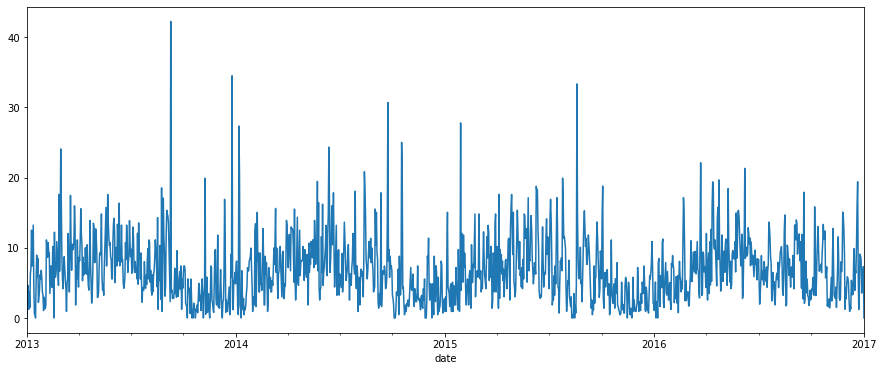

In [22]:
dados3.wind_speed.plot(figsize =(15,6))

#### Visualização dos gráficos da FAC e FACP

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

import matplotlib.pyplot as plt

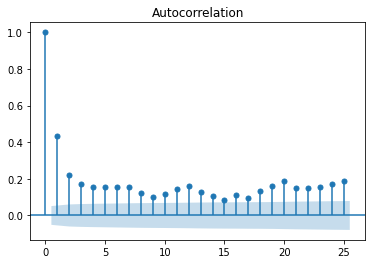

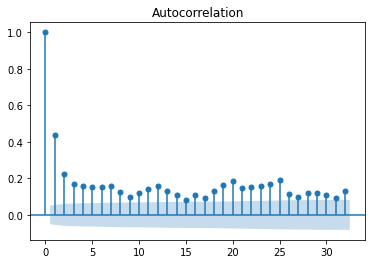

In [70]:
plot_acf(dados3.wind_speed, lags = 25)  ## Especificando qtd de lags

plot_acf(dados3.wind_speed)
plt.show()

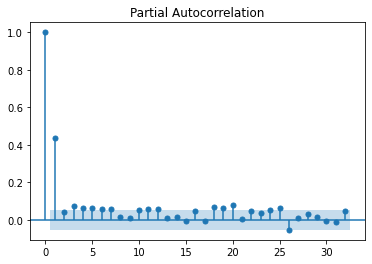

In [25]:
plot_pacf(dados3.wind_speed)
plt.show()

### 3. Separação em treino e teste

In [29]:
tam_serie = int(len(dados3.wind_speed))
tam_serie

1462

#### Treino

In [34]:
tam_treino = int(len(dados3.wind_speed)* 2/3)
tam_treino

974

In [42]:
serie_treino = dados3.wind_speed[: tam_treino]
serie_treino

date
2013-01-01     0.000000
2013-01-02     2.980000
2013-01-03     4.633333
2013-01-04     1.233333
2013-01-05     3.700000
                ...    
2015-08-28     2.312500
2015-08-29     5.812500
2015-08-30     9.275000
2015-08-31    13.485714
2015-09-01    15.275000
Name: wind_speed, Length: 974, dtype: float64

#### Teste

In [43]:
serie_teste = dados3.wind_speed[tam_treino :]
serie_teste


date
2015-09-02    12.737500
2015-09-03    10.187500
2015-09-04    11.350000
2015-09-05     7.637500
2015-09-06     7.637500
                ...    
2016-12-28     3.547826
2016-12-29     6.000000
2016-12-30     6.266667
2016-12-31     7.325000
2017-01-01     0.000000
Name: wind_speed, Length: 488, dtype: float64

#### Visualização gráfica da série parte treino e teste

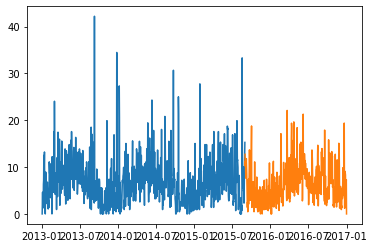

In [54]:
plt.plot(serie_treino)
plt.plot(serie_teste)

### 4. Criação do Modelo ARMA

In [48]:
from statsmodels.tsa.arima_model import ARMA

Criação do Modelo apartir da série completa

In [51]:
modelo_ARMA = ARMA(dados3.wind_speed, freq= 'D', order = (2,2)).fit()
modelo_ARMA.params

C:\Users\usuario\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




const               6.720615
ar.L1.wind_speed    1.213925
ar.L2.wind_speed   -0.224914
ma.L1.wind_speed   -0.832961
ma.L2.wind_speed   -0.105639
dtype: float64

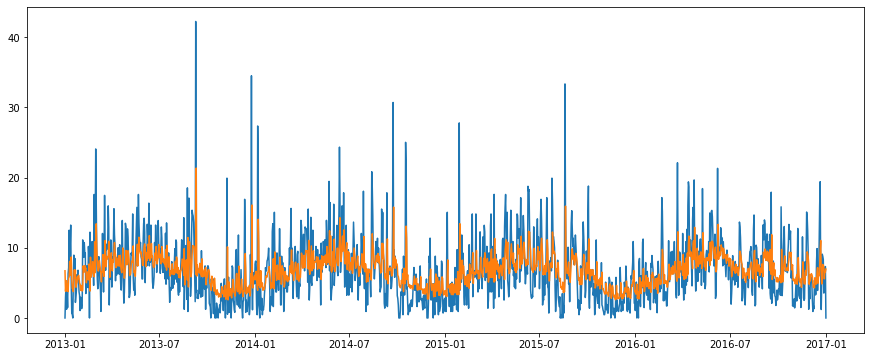

In [53]:
plt.figure(figsize = (15,6))
plt.plot(dados3.wind_speed)
plt.plot(modelo_ARMA.predict())

#### 4.1. Criação do Modelo usando dados de treinamento

In [57]:
modelo_ARMA_treino = ARMA(serie_treino, freq= 'D', order = (2,2)).fit()
modelo_ARMA_treino.params

C:\Users\usuario\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




const               6.912813
ar.L1.wind_speed    1.212280
ar.L2.wind_speed   -0.223550
ma.L1.wind_speed   -0.874822
ma.L2.wind_speed   -0.069501
dtype: float64

## 5. Previsão

A previsão será em cima do conjunto de teste


In [64]:
modelo_ARMA_teste = ARMA(serie_teste, freq= 'D', order = (2,2)).fit(modelo_ARMA_treino.params)
modelo_ARMA_teste.params

const               6.525484
ar.L1.wind_speed    1.193810
ar.L2.wind_speed   -0.206831
ma.L1.wind_speed   -0.663093
ma.L2.wind_speed   -0.251265
dtype: float64

#### 5.1. Verificação Qualidade do Modelo

Verificação do Erro médio Quadrático,temos a intenção de obter sempre o modelo com menor erro quadrático

In [65]:
(modelo_ARMA_teste.resid ** 2).mean()

10.884654430701387

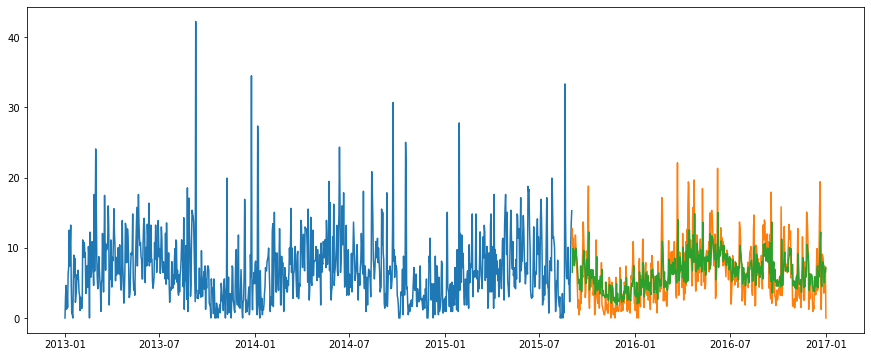

In [67]:
plt.figure(figsize = (15,6))
plt.plot(serie_treino)
plt.plot(serie_teste)
plt.plot(modelo_ARMA_teste.predict()) ## Modelo Ajustado

### Testando vários modelos simultaneamente e retornando respectivos Erro médio Quadrático

In [68]:
configs = [(1,0), (2,0), (3,0), (4,0), (2,1), (2,2), (3,1), (3,2), (3,3)]

best = 100000

for config in configs:
    
    arma = ARMA(serie_treino, freq= 'D', order = config).fit()
    arma_teste = ARMA(serie_teste, freq= 'D', order = config).fit(arma.params)
    erro = (arma_teste.resid ** 2).mean()

    if erro < best:
        best = erro
        print(config, erro)

(1, 0) 11.460461995355315
(2, 0) 11.456824791371577
(3, 0) 11.247260544267089
(4, 0) 11.158787279526424


C:\Users\usuario\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




(2, 1) 11.02301320238484


C:\Users\usuario\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




(2, 2) 10.884654430701387


C:\Users\usuario\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\usuario\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels

(3, 3) 10.825277648319197


Dentre os modelos analisados o que apresentou menor erro foi o modelo ARMA(3,3)